<h1>Proyecto 1</h1>

In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as F1
from sklearn.metrics import precision_score as PS
from sklearn.metrics import recall_score as RS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [22]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8", index_col=0)
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.sample(5)

,text,class
Unnamed: 0,,
321177,How the hell? HOW THE HELL DID THE DISTRICT BL...,non-suicide
268493,I think it's time but I'm afraidI think I'm re...,suicide
88529,"I’m doneI can’t take it anymore, I’m no good f...",suicide
264293,I may set a date. I need to vent / rant.I hate...,suicide
209186,Idk what I must do. BOTH LIVING AND DYING AREN...,suicide


In [24]:
df.dtypes

text     object
class    object
dtype: object

In [25]:
# size of the dataset
df.shape

(195700, 2)

In [26]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=28)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((136990,), (58710,), (136990,), (58710,))

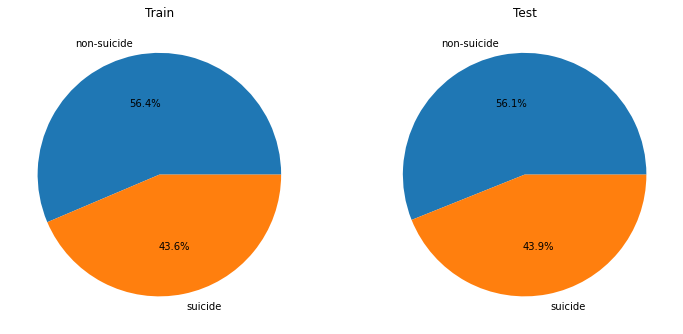

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [30]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [32]:
bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_bow = bow.fit_transform(x_train)
x_test_bow = bow.transform(x_test)
len(bow.get_feature_names())

c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


145256

In [33]:
x_train_bow.shape

(136990, 145256)

In [34]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
len(tfidf.get_feature_names())

145256

In [35]:
bow_model = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
bow_model.fit(x_train_bow, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [36]:
bow_pred_train = bow_model.predict(x_train_bow)
bow_pred_test = bow_model.predict(x_train_bow)

ValueError: indices and data should have the same size

In [ ]:
cm_train = confusion_matrix(y_train, bow_pred_train)
cm_test = confusion_matrix(y_test, bow_pred_test)
cm_train_norm = confusion_matrix(y_train, bow_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, bow_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
fig1 = ConfusionMatrixDisplay(cm_train, display_labels=coder_severidad.values()).plot(ax=ax[0, 0])
fig2 = ConfusionMatrixDisplay(cm_test, display_labels=coder_severidad.values()).plot(ax=ax[0, 1])
fig3 = ConfusionMatrixDisplay(cm_train_n, display_labels=coder_severidad.values()).plot(ax=ax[1, 0])
fig4 = ConfusionMatrixDisplay(cm_test_n, display_labels=coder_severidad.values()).plot(ax=ax[1, 1])
plt.show()